<a href="https://colab.research.google.com/github/RAHULMANDAL100/Celebal_DataScience/blob/main/EnergyConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings('ignore')

In [25]:

data = pd.read_csv('2010-2011 Solar home electricity data.csv')
data.head()

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00
0,1,3.78,2076,GC,1-Jul-10,0.303,0.471,0.083,0.121,0.361,...,0.495,0.54,0.406,0.543,0.495,0.216,0.378,0.128,0.078,0.125
1,1,3.78,2076,CL,1-Jul-10,1.250,1.244,1.256,0.744,0.019,...,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.075
2,1,3.78,2076,GG,1-Jul-10,0.000,0.000,0.000,0.000,0.000,...,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,1,3.78,2076,GC,2-Jul-10,0.116,0.346,0.122,0.079,0.120,...,0.262,1.10,1.012,0.817,0.526,0.335,0.402,0.142,0.120,0.111
4,1,3.78,2076,CL,2-Jul-10,1.238,1.238,1.256,1.250,0.169,...,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.088


In [26]:
data.shape

(27266, 53)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27266 entries, 0 to 27265
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer              27266 non-null  int64  
 1   Generator Capacity    27266 non-null  float64
 2   Postcode              27266 non-null  int64  
 3   Consumption Category  27266 non-null  object 
 4   date                  27266 non-null  object 
 5   0:30                  27266 non-null  float64
 6   1:00                  27266 non-null  float64
 7   1:30                  27266 non-null  float64
 8   2:00                  27266 non-null  float64
 9   2:30                  27266 non-null  float64
 10  3:00                  27266 non-null  float64
 11  3:30                  27266 non-null  float64
 12  4:00                  27266 non-null  float64
 13  4:30                  27266 non-null  float64
 14  5:00                  27266 non-null  float64
 15  5:30               

In [28]:
data.describe()

,Customer,Generator Capacity,Postcode,0:30,1:00,1:30,2:00,2:30,3:00,3:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00
count,27266.000000,27266.000000,27266.000000,27266.000000,27266.000000,27266.000000,27266.000000,27266.000000,27266.000000,27266.000000,...,27265.000000,27265.000000,27265.000000,27265.000000,27265.000000,27265.000000,27265.000000,27265.000000,27265.000000,27265.000000
mean,14.207768,1.644178,2224.837307,0.198286,0.157541,0.166526,0.132346,0.124266,0.103356,0.095902,...,0.221706,0.203781,0.217943,0.195734,0.170856,0.157558,0.147314,0.148261,0.185512,0.209756
std,8.478402,0.978363,70.987273,0.467920,0.391089,0.414297,0.344882,0.319873,0.260467,0.235680,...,0.435345,0.404210,0.422121,0.386651,0.339459,0.326612,0.307038,0.346587,0.435189,0.469469
min,1.000000,1.000000,2026.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.020000,2220.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,1.500000,2259.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.000000,1.850000,2262.000000,0.139000,0.121000,0.122000,0.113000,0.111000,0.106000,0.102000,...,0.263000,0.250000,0.263000,0.238000,0.209000,0.175000,0.163000,0.144000,0.158000,0.162000
max,29.000000,5.900000,2305.000000,5.312000,5.274000,2.857000,3.025000,3.013000,3.300000,3.125000,...,6.592000,6.975000,6.572000,6.156000,5.959000,5.724000,5.460000,5.413000,5.361000,5.323000


In [29]:
data["Total_Energy_Consumption"] = data["0:30"] + data["1:00"]+data["1:30"]+data["2:00"]+data["2:30"]+data["3:00"]+data["3:30"]+data["4:00"]+data["4:30"] + data["5:00"]+data["5:30"]+data["6:00"]+data["6:30"]+data["7:00"]+data["7:30"]+data["8:00"]+data["8:30"] + data["9:00"]+data["9:30"]+data["10:00"]+data["10:30"]+data["11:00"]+data["11:30"]+data["12:00"]+data["12:30"] + data["13:00"]+data["13:30"]+data["14:00"]+data["14:30"]+data["15:00"]+data["15:30"]+data["16:00"]+data["16:30"] + data["17:00"]+data["17:30"]+data["18:00"]+data["18:30"]+data["19:00"]+data["19:30"]+data["20:00"]+data["20:30"] + data["21:00"]+data["21:30"]+data["22:00"]+data["22:30"]+data["23:00"]+data["23:30"]+data["0:00"]

data.head()

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Total_Energy_Consumption
0,1,3.78,2076,GC,1-Jul-10,0.303,0.471,0.083,0.121,0.361,...,0.54,0.406,0.543,0.495,0.216,0.378,0.128,0.078,0.125,31.984
1,1,3.78,2076,CL,1-Jul-10,1.250,1.244,1.256,0.744,0.019,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.075,7.945
2,1,3.78,2076,GG,1-Jul-10,0.000,0.000,0.000,0.000,0.000,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10.020
3,1,3.78,2076,GC,2-Jul-10,0.116,0.346,0.122,0.079,0.120,...,1.10,1.012,0.817,0.526,0.335,0.402,0.142,0.120,0.111,27.166
4,1,3.78,2076,CL,2-Jul-10,1.238,1.238,1.256,1.250,0.169,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.088,8.646


In [30]:
data['Total_Energy_Consumption'].value_counts()

0.000    1223
0.012      33
0.006      18
3.227       8
2.928       7
         ... 
7.454       1
3.752       1
4.409       1
4.597       1
1.063       1
Name: Total_Energy_Consumption, Length: 20832, dtype: int64

<Axes: xlabel='date'>

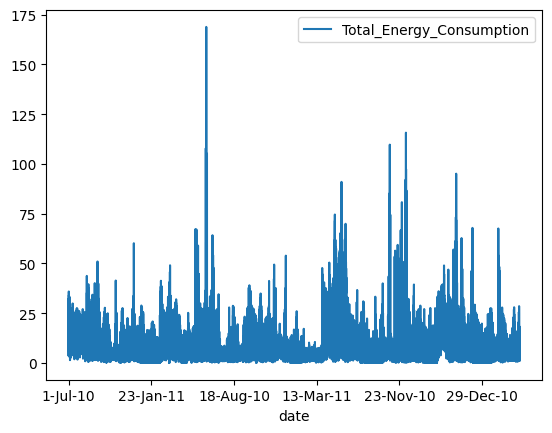

In [31]:
data.plot(x='date',y='Total_Energy_Consumption')

In [32]:
data.isnull().sum().sum()

31

In [33]:
data.dropna()

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Total_Energy_Consumption
0,1,3.78,2076,GC,1-Jul-10,0.303,0.471,0.083,0.121,0.361,...,0.54,0.406,0.543,0.495,0.216,0.378,0.128,0.078,0.125,31.984
1,1,3.78,2076,CL,1-Jul-10,1.250,1.244,1.256,0.744,0.019,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.075,7.945
2,1,3.78,2076,GG,1-Jul-10,0.000,0.000,0.000,0.000,0.000,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10.020
3,1,3.78,2076,GC,2-Jul-10,0.116,0.346,0.122,0.079,0.120,...,1.10,1.012,0.817,0.526,0.335,0.402,0.142,0.120,0.111,27.166
4,1,3.78,2076,CL,2-Jul-10,1.238,1.238,1.256,1.250,0.169,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.088,8.646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27260,29,1.70,2259,GG,23-May-11,0.000,0.000,0.000,0.000,0.000,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.508
27261,29,1.70,2259,GC,24-May-11,0.054,0.031,0.073,0.116,0.109,...,0.14,0.166,0.180,0.174,0.127,0.143,0.039,0.039,0.053,8.621
27262,29,1.70,2259,CL,24-May-11,0.000,0.000,0.000,0.135,0.527,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.612
27263,29,1.70,2259,GG,24-May-11,0.000,0.000,0.000,0.000,0.000,...,0.00,0.000,0.000,0.000,0.000,0.006,0.000,0.000,0.000,1.063


In [34]:
data.fillna('missing')

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Total_Energy_Consumption
0,1,3.78,2076,GC,1-Jul-10,0.303,0.471,0.083,0.121,0.361,...,0.54,0.406,0.543,0.495,0.216,0.378,0.128,0.078,0.125,31.984
1,1,3.78,2076,CL,1-Jul-10,1.250,1.244,1.256,0.744,0.019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.075,7.945
2,1,3.78,2076,GG,1-Jul-10,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.02
3,1,3.78,2076,GC,2-Jul-10,0.116,0.346,0.122,0.079,0.120,...,1.1,1.012,0.817,0.526,0.335,0.402,0.142,0.12,0.111,27.166
4,1,3.78,2076,CL,2-Jul-10,1.238,1.238,1.256,1.250,0.169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.088,8.646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27261,29,1.70,2259,GC,24-May-11,0.054,0.031,0.073,0.116,0.109,...,0.14,0.166,0.18,0.174,0.127,0.143,0.039,0.039,0.053,8.621
27262,29,1.70,2259,CL,24-May-11,0.000,0.000,0.000,0.135,0.527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.612
27263,29,1.70,2259,GG,24-May-11,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,1.063
27264,29,1.70,2259,GC,25-May-11,0.059,0.039,0.026,0.091,0.020,...,0.92,0.824,0.835,0.966,0.857,0.12,0.055,0.043,0.036,17.968


In [35]:
data.fillna('0')

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Total_Energy_Consumption
0,1,3.78,2076,GC,1-Jul-10,0.303,0.471,0.083,0.121,0.361,...,0.54,0.406,0.543,0.495,0.216,0.378,0.128,0.078,0.125,31.984
1,1,3.78,2076,CL,1-Jul-10,1.250,1.244,1.256,0.744,0.019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.075,7.945
2,1,3.78,2076,GG,1-Jul-10,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.02
3,1,3.78,2076,GC,2-Jul-10,0.116,0.346,0.122,0.079,0.120,...,1.1,1.012,0.817,0.526,0.335,0.402,0.142,0.12,0.111,27.166
4,1,3.78,2076,CL,2-Jul-10,1.238,1.238,1.256,1.250,0.169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.088,8.646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27261,29,1.70,2259,GC,24-May-11,0.054,0.031,0.073,0.116,0.109,...,0.14,0.166,0.18,0.174,0.127,0.143,0.039,0.039,0.053,8.621
27262,29,1.70,2259,CL,24-May-11,0.000,0.000,0.000,0.135,0.527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.612
27263,29,1.70,2259,GG,24-May-11,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,1.063
27264,29,1.70,2259,GC,25-May-11,0.059,0.039,0.026,0.091,0.020,...,0.92,0.824,0.835,0.966,0.857,0.12,0.055,0.043,0.036,17.968


In [36]:
data['Consumption Category'].value_counts()

GC    10549
GG    10548
CL     6169
Name: Consumption Category, dtype: int64

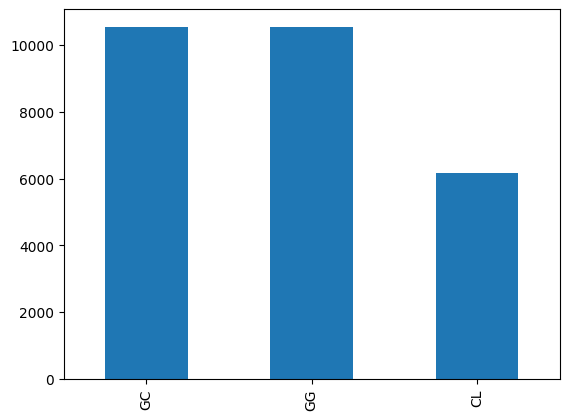

In [37]:
data['Consumption Category'].value_counts().plot(kind='bar')
plt.show()


In [38]:
# convert the 'Date' column to datetime format

data['date']= pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27266 entries, 0 to 27265
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Customer                  27266 non-null  int64         
 1   Generator Capacity        27266 non-null  float64       
 2   Postcode                  27266 non-null  int64         
 3   Consumption Category      27266 non-null  object        
 4   date                      27266 non-null  datetime64[ns]
 5   0:30                      27266 non-null  float64       
 6   1:00                      27266 non-null  float64       
 7   1:30                      27266 non-null  float64       
 8   2:00                      27266 non-null  float64       
 9   2:30                      27266 non-null  float64       
 10  3:00                      27266 non-null  float64       
 11  3:30                      27266 non-null  float64       
 12  4:00              

Consumption Category
CL    Axes(0.125,0.2;0.775x0.68)
GC    Axes(0.125,0.2;0.775x0.68)
GG    Axes(0.125,0.2;0.775x0.68)
Name: Total_Energy_Consumption, dtype: object

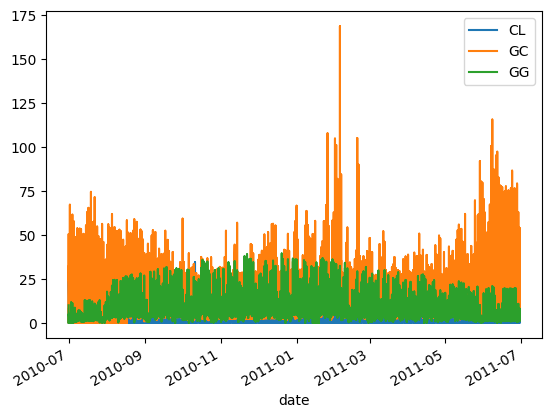

In [39]:
data.set_index('date', inplace=True)
data.groupby('Consumption Category')['Total_Energy_Consumption'].plot(legend=True)

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

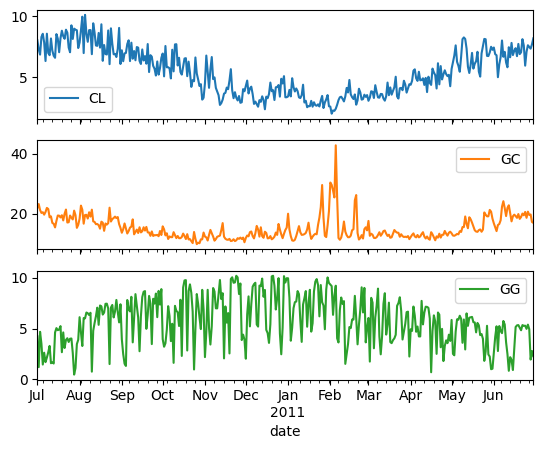

In [40]:
pd.pivot_table(data.reset_index(),
               index='date', columns='Consumption Category', values='Total_Energy_Consumption'
              ).plot(subplots=True)